In [56]:
import pandas as pd
import DateTime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('Sample-data.csv')

In [3]:
df.head(6)

,Month Year,,Indicator 2,Indicator 3,Indicator4,RM 1,RM 2,RM 3,RM4,RM5,Product 1,Product 2,Product3,Product4,Product5,Product6
0,Apr 2019,$ 71.48,$ 587.23,$ 625.68,$ 625.91,$ 892.92,"$ 3,154.40","$ 1,050.64","$ 1,143.78",$ 438.39,"$ 1,897.61","$ 2,727.19","$ 3,248.79","$ 3,993.92","$ 2,493.72","$ 3,055.05"
1,May 2019,$ 70.22,$ 561.09,$ 622.17,$ 583.79,$ 856.02,"$ 2,989.98","$ 1,031.56","$ 1,111.68",$ 454.32,"$ 1,830.04","$ 2,738.69","$ 3,190.28","$ 3,882.24","$ 2,436.41","$ 3,008.19"
2,Jun 2019,$ 62.87,$ 480.60,$ 622.00,$ 642.43,$ 855.78,"$ 2,885.92",$ 954.10,"$ 1,094.03",$ 445.25,"$ 1,771.90","$ 2,675.11","$ 3,111.27","$ 3,761.87","$ 2,177.16","$ 2,973.15"
3,Jul 2019,$ 64.23,$ 514.91,$ 668.91,$ 731.23,$ 882.57,"$ 2,753.93",$ 974.97,"$ 1,092.29",$ 484.76,"$ 1,655.27","$ 2,619.32","$ 2,899.45","$ 3,565.19","$ 1,920.84","$ 2,757.57"
4,Aug 2019,$ 59.48,$ 468.95,$ 655.68,$ 701.53,$ 874.66,"$ 2,646.94","$ 1,012.57","$ 1,064.62",$ 543.37,"$ 1,518.86","$ 2,461.54","$ 2,664.06","$ 3,248.78","$ 1,825.48","$ 2,498.62"
5,Sep 2019,$ 62.29,$ 502.14,$ 709.52,$ 782.25,"$ 1,019.92","$ 2,631.03","$ 1,073.60","$ 1,175.13",$ 639.22,"$ 1,726.94","$ 2,429.73","$ 2,631.03","$ 3,111.33","$ 1,892.93","$ 2,496.83"


In [4]:
df.columns

Index(['Month Year', '  ', 'Indicator 2', 'Indicator 3', 'Indicator4', 'RM 1',
       'RM 2', 'RM 3', 'RM4', 'RM5', 'Product 1', 'Product 2', 'Product3',
       'Product4', 'Product5', 'Product6'],
      dtype='object')

In [5]:
df.rename(columns={'  ':'Indicator 1'}, inplace=True)
df.head(5)

,Month Year,Indicator 1,Indicator 2,Indicator 3,Indicator4,RM 1,RM 2,RM 3,RM4,RM5,Product 1,Product 2,Product3,Product4,Product5,Product6
0,Apr 2019,$ 71.48,$ 587.23,$ 625.68,$ 625.91,$ 892.92,"$ 3,154.40","$ 1,050.64","$ 1,143.78",$ 438.39,"$ 1,897.61","$ 2,727.19","$ 3,248.79","$ 3,993.92","$ 2,493.72","$ 3,055.05"
1,May 2019,$ 70.22,$ 561.09,$ 622.17,$ 583.79,$ 856.02,"$ 2,989.98","$ 1,031.56","$ 1,111.68",$ 454.32,"$ 1,830.04","$ 2,738.69","$ 3,190.28","$ 3,882.24","$ 2,436.41","$ 3,008.19"
2,Jun 2019,$ 62.87,$ 480.60,$ 622.00,$ 642.43,$ 855.78,"$ 2,885.92",$ 954.10,"$ 1,094.03",$ 445.25,"$ 1,771.90","$ 2,675.11","$ 3,111.27","$ 3,761.87","$ 2,177.16","$ 2,973.15"
3,Jul 2019,$ 64.23,$ 514.91,$ 668.91,$ 731.23,$ 882.57,"$ 2,753.93",$ 974.97,"$ 1,092.29",$ 484.76,"$ 1,655.27","$ 2,619.32","$ 2,899.45","$ 3,565.19","$ 1,920.84","$ 2,757.57"
4,Aug 2019,$ 59.48,$ 468.95,$ 655.68,$ 701.53,$ 874.66,"$ 2,646.94","$ 1,012.57","$ 1,064.62",$ 543.37,"$ 1,518.86","$ 2,461.54","$ 2,664.06","$ 3,248.78","$ 1,825.48","$ 2,498.62"


In [6]:
df['RM 1'].dtypes

dtype('O')

# We will follow the multiple approaches for this project as a part of A/B testing to forecast the sales of product 1 to product 6.

1 Simple Time Series approach using timestamp such as month and year w.r.t previous sales just to get understanding of product sales with in a time frame.

In [7]:
# WE will remove the $ sign from each field and separate Month and year and will also convert datatypes to convert in to interger and date field.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month Year   57 non-null     object
 1   Indicator 1  57 non-null     object
 2   Indicator 2  57 non-null     object
 3   Indicator 3  57 non-null     object
 4   Indicator4   57 non-null     object
 5   RM 1         57 non-null     object
 6   RM 2         57 non-null     object
 7   RM 3         57 non-null     object
 8   RM4          57 non-null     object
 9   RM5          57 non-null     object
 10  Product 1    57 non-null     object
 11  Product 2    57 non-null     object
 12  Product3     57 non-null     object
 13  Product4     57 non-null     object
 14  Product5     57 non-null     object
 15  Product6     57 non-null     object
dtypes: object(16)
memory usage: 7.2+ KB


In [8]:
def remove_dollar_sign_convert_dt(df):
    for i in df.columns[1:]:
        df[i]=df[i].str.replace('$','').str.replace(',','').str.strip()
        df[i] = pd.to_numeric(df[i]).astype(float)

    return df    
        
remove_dollar_sign_convert_dt(df)        
df.head(6)

,Month Year,Indicator 1,Indicator 2,Indicator 3,Indicator4,RM 1,RM 2,RM 3,RM4,RM5,Product 1,Product 2,Product3,Product4,Product5,Product6
0,Apr 2019,71.48,587.23,625.68,625.91,892.92,3154.40,1050.64,1143.78,438.39,1897.61,2727.19,3248.79,3993.92,2493.72,3055.05
1,May 2019,70.22,561.09,622.17,583.79,856.02,2989.98,1031.56,1111.68,454.32,1830.04,2738.69,3190.28,3882.24,2436.41,3008.19
2,Jun 2019,62.87,480.60,622.00,642.43,855.78,2885.92,954.10,1094.03,445.25,1771.90,2675.11,3111.27,3761.87,2177.16,2973.15
3,Jul 2019,64.23,514.91,668.91,731.23,882.57,2753.93,974.97,1092.29,484.76,1655.27,2619.32,2899.45,3565.19,1920.84,2757.57
4,Aug 2019,59.48,468.95,655.68,701.53,874.66,2646.94,1012.57,1064.62,543.37,1518.86,2461.54,2664.06,3248.78,1825.48,2498.62
5,Sep 2019,62.29,502.14,709.52,782.25,1019.92,2631.03,1073.60,1175.13,639.22,1726.94,2429.73,2631.03,3111.33,1892.93,2496.83


In [9]:
df[['Month', 'Year']] = df['Month Year'].str.extract(r'([A-Za-z]+)\s+(\d{4})')
df.head(4)

,Month Year,Indicator 1,Indicator 2,Indicator 3,Indicator4,RM 1,RM 2,RM 3,RM4,RM5,Product 1,Product 2,Product3,Product4,Product5,Product6,Month,Year
0,Apr 2019,71.48,587.23,625.68,625.91,892.92,3154.40,1050.64,1143.78,438.39,1897.61,2727.19,3248.79,3993.92,2493.72,3055.05,Apr,2019
1,May 2019,70.22,561.09,622.17,583.79,856.02,2989.98,1031.56,1111.68,454.32,1830.04,2738.69,3190.28,3882.24,2436.41,3008.19,May,2019
2,Jun 2019,62.87,480.60,622.00,642.43,855.78,2885.92,954.10,1094.03,445.25,1771.90,2675.11,3111.27,3761.87,2177.16,2973.15,Jun,2019
3,Jul 2019,64.23,514.91,668.91,731.23,882.57,2753.93,974.97,1092.29,484.76,1655.27,2619.32,2899.45,3565.19,1920.84,2757.57,Jul,2019


In [10]:
df['Year'].astype(int).head(6)

0    2019
1    2019
2    2019
3    2019
4    2019
5    2019
Name: Year, dtype: int32

In [11]:
# converting all parameters in a set of dataset for product 1
def dataframecreation(df):
    month=[]
    year=[]    
    indicator1=[]
    indicator2=[]
    indicator3=[]
    indicator4=[]
    rm1=[]
    rm2=[]
    rm3=[]
    rm4=[]
    rm5=[]
    product1=[]
    for i in df.columns: 
        if (i == 'Month'):
            month=df[i].to_list()
        elif i == 'Year':
            year=df[i].to_list()
        elif i == 'Indicator 1':
            indicator1=df[i].to_list()    
        elif i == 'Indicator 2':
            indicator2=df[i].to_list()  
        elif i == 'Indicator 3':
            indicator3=df[i].to_list()
        elif i == 'Indicator4':
            indicator4=df[i].to_list()
        elif i == 'RM 1':
            rm1=df[i].to_list()
        elif i == 'RM 2':
            rm2=df[i].to_list()
        elif i == 'RM 3':
            rm3=df[i].to_list()
        elif i == 'RM4':
            rm4=df[i].to_list()
        elif i == 'RM5':
            rm5=df[i].to_list() 
        elif i == 'Product 1':
            product1=df[i].to_list()
            
    return month,year,indicator1,indicator2,indicator3,indicator4,rm1,rm2,rm3,rm4,rm5,product1
(month,year,indicator1,indicator2,indicator3,indicator4,rm1,rm2,rm3,rm4,rm5,product1)=dataframecreation(df)
print("month:", month)
print("year:",year)
print("indicator1:", indicator1)
print("indicator2:", indicator2)
print("indicator3:", indicator3)
print("indicator4:", indicator4)
print("RM 1:", rm1)
print("RM 2:", rm2)
print("RM 3:", rm3)
print("RM 4:", rm4)
print("RM 5:", rm5)
print("Product 1:", product1)

month: ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
year: ['2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023']
indicator1: [71.48, 70.22, 62.87, 64.23, 59.48, 62.29, 59.64, 62.68, 65.1, 63.78, 55.48, 33.55, 26.85, 32.4, 40.64, 43.22, 45.03, 

In [12]:
df.isnull().sum()

Month Year     0
Indicator 1    0
Indicator 2    0
Indicator 3    0
Indicator4     0
RM 1           0
RM 2           0
RM 3           0
RM4            0
RM5            0
Product 1      0
Product 2      0
Product3       0
Product4       0
Product5       0
Product6       0
Month          0
Year           0
dtype: int64

Till this point we have checked and validate our data in terms of additional values we have cleaned it and converted into respected data types:
-                                                        Agendas
- 1 First we will approach for simple time series forecasting using Univariate analysis for Product 1 case study.
- 2 After above approach-> we will proceed with Multivariate time series analysis so that we can analyze other factors suchs as Indicators and RMs
- 3 Approaches will include Uni and Multi variate time series analysis --> Then Time series forecasting -- Machine learning -- Deep learning RNN/LSTM.

In [13]:
df1=df.copy()
df1.head()

,Month Year,Indicator 1,Indicator 2,Indicator 3,Indicator4,RM 1,RM 2,RM 3,RM4,RM5,Product 1,Product 2,Product3,Product4,Product5,Product6,Month,Year
0,Apr 2019,71.48,587.23,625.68,625.91,892.92,3154.40,1050.64,1143.78,438.39,1897.61,2727.19,3248.79,3993.92,2493.72,3055.05,Apr,2019
1,May 2019,70.22,561.09,622.17,583.79,856.02,2989.98,1031.56,1111.68,454.32,1830.04,2738.69,3190.28,3882.24,2436.41,3008.19,May,2019
2,Jun 2019,62.87,480.60,622.00,642.43,855.78,2885.92,954.10,1094.03,445.25,1771.90,2675.11,3111.27,3761.87,2177.16,2973.15,Jun,2019
3,Jul 2019,64.23,514.91,668.91,731.23,882.57,2753.93,974.97,1092.29,484.76,1655.27,2619.32,2899.45,3565.19,1920.84,2757.57,Jul,2019
4,Aug 2019,59.48,468.95,655.68,701.53,874.66,2646.94,1012.57,1064.62,543.37,1518.86,2461.54,2664.06,3248.78,1825.48,2498.62,Aug,2019


In [14]:
df1=df1[['Month','Year','Product 1']]
df1.head(5)

,Month,Year,Product 1
0,Apr,2019,1897.61
1,May,2019,1830.04
2,Jun,2019,1771.90
3,Jul,2019,1655.27
4,Aug,2019,1518.86


<AxesSubplot:xlabel='Year', ylabel='Product 1'>

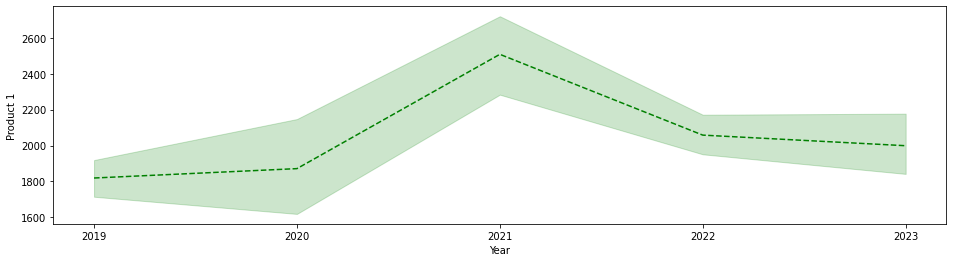

In [15]:
# Understanding product 1 sales using various charts
plt.subplots(figsize=(16,4))

sns.lineplot(data=df1,x='Year',y='Product 1', ls='--', color='green')

We can see After 2020 till 2022 there was a high sale as compared to other years.
Now we will see yearwise monthly data.

<Figure size 720x432 with 0 Axes>

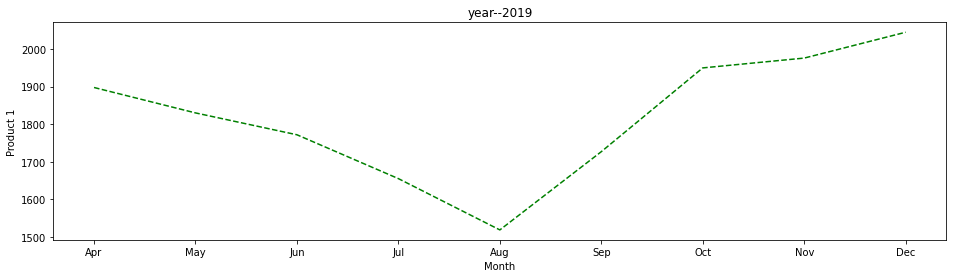

<Figure size 720x432 with 0 Axes>

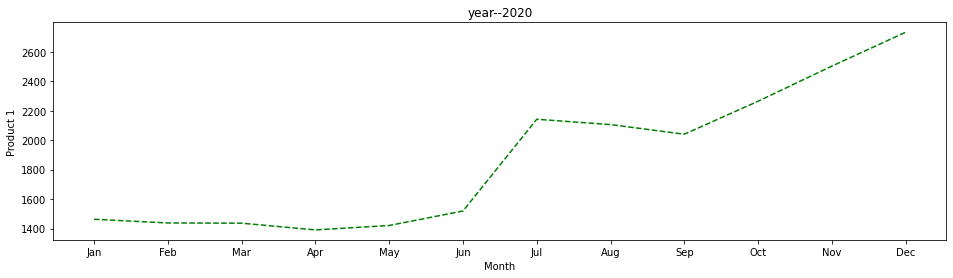

<Figure size 720x432 with 0 Axes>

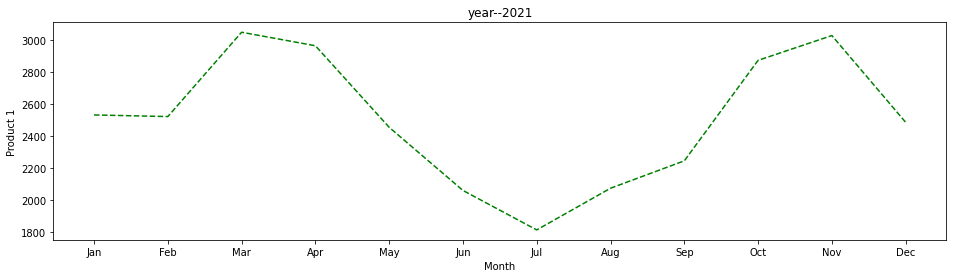

<Figure size 720x432 with 0 Axes>

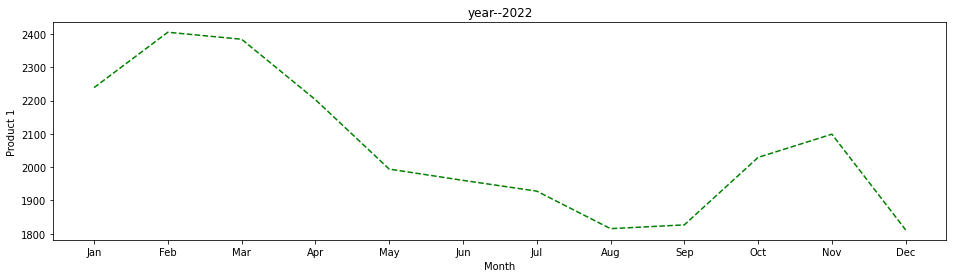

<Figure size 720x432 with 0 Axes>

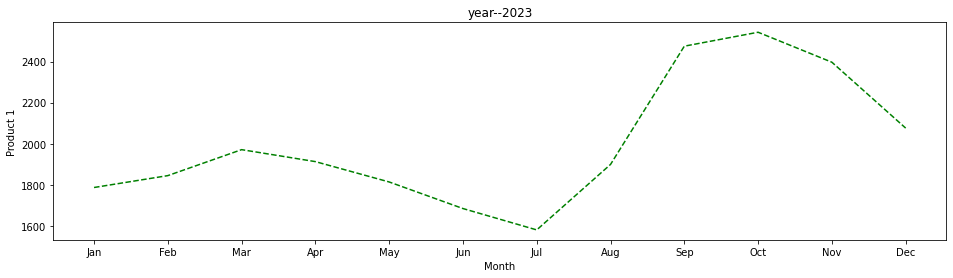

In [16]:
years = list(df1['Year'].value_counts().index.sort_values())
def yearly(x):
    plt.figure(figsize=(10, 6))  # Change size as needed

    newd=df1[(df1['Year']==x)]
    plt.subplots(figsize = (16,4))

    sns.lineplot(data=newd,x=newd.Month,ls='--',y=newd['Product 1'],color='green')
    plt.title(f'year--{x}')
    plt.show()
    
    
    
    
    
for i in years:
    yearly(i)

# we will see average sale value in each montth year wise

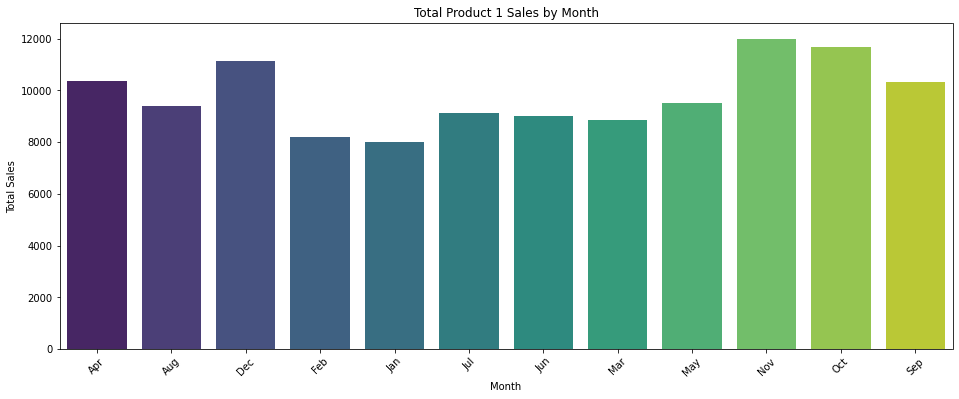

In [17]:


# Group by Month and calculate the sum of Product 1 sales
monthly_sales_sum = df1.groupby('Month')['Product 1'].sum().reset_index()

# Plotting the summed sales
plt.figure(figsize=(16, 6))
sns.barplot(data=monthly_sales_sum, x='Month', y='Product 1', palette='viridis')
plt.title('Total Product 1 Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

- From this graph we can predict that data is ranging from 8000 - 12000 and maintain a decent consistency.

- Reason being that in 2019 oout product was not launched in given months --> Jan, Feb March

<Figure size 1152x432 with 0 Axes>

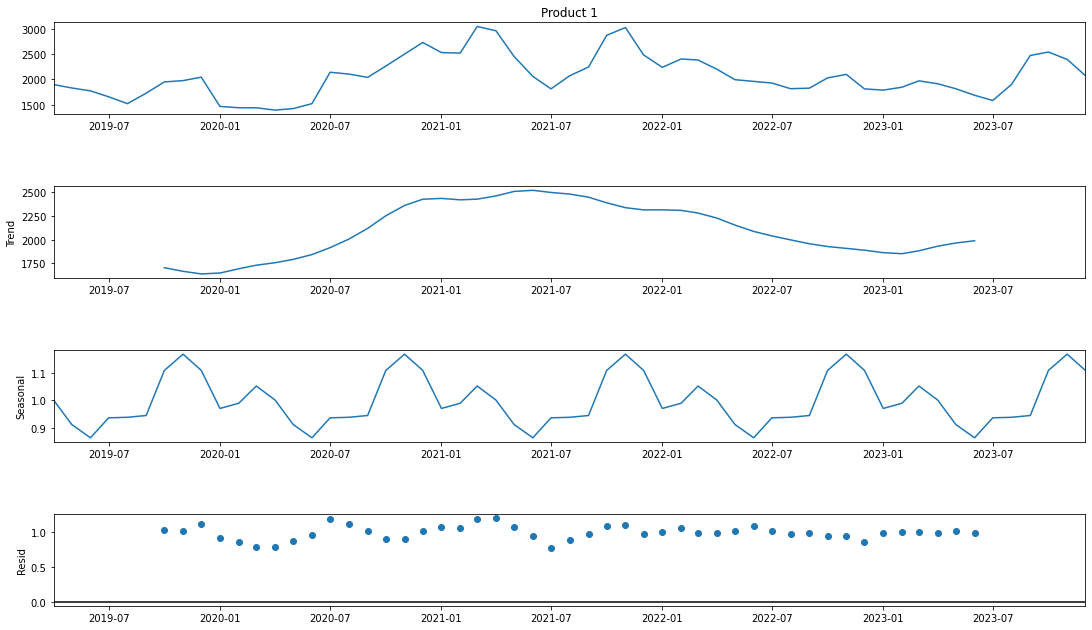

In [18]:
# Now lets start with time series -- 
#we have made a constant timestamp across month and year just to take the help for seasonal decomposition
df1['Date'] = pd.to_datetime(df1['Year'].astype(str) + '-' + df1['Month'], format='%Y-%b')

# Set 'Date' column as index
df1.set_index('Date', inplace=True)
fig=plt.figure(figsize=((16,6)))
result=seasonal_decompose(df1['Product 1'],model='multiplicative')
fig=result.plot()
fig.set_size_inches(17,10)

In decomposition we can see 
- Residual parameter getting some noise or product sales is influenced by other external factors.
- How we can take care of this kind of issues now
--------------------------------------------------------------------
- Evaluate different seasonal decomposition models (e.g., additive vs. multiplicative) to see which one provides a better fit to your data.
- Consider incorporating additional features or predictors into your model to capture more of the underlying patterns in the data.
- Examine the data for outliers or anomalies and consider whether they should be treated or accounted for in the modeling process.
- Experiment with different parameter settings or adjustments to the seasonal decomposition model to see if they improve the fit to the data.

# Other features
- Includes Trend --> It is increasing and then decreasing Highest is around Jan 2021 to Jan 2022
- There is a season trend which is going on that means we have to use Sarima model as well 

<AxesSubplot:xlabel='Product 1'>

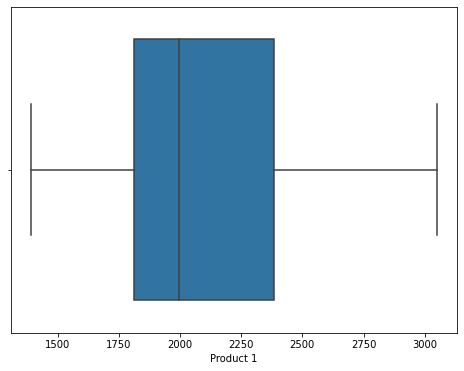

In [19]:
# checking outliers in Product 1 sales data
plt.figure(figsize=(8, 6))

sns.boxplot(data=df1,x='Product 1')

We can see that out product parameter does not contains any anomaly.
We are getting high residual may be due to very less historic data.

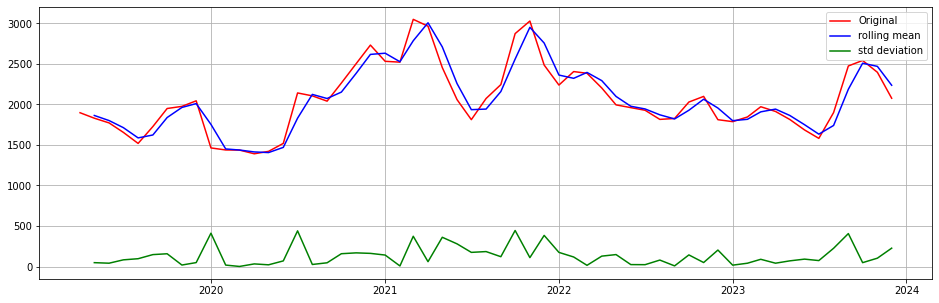

In [20]:
std_deviation = df1['Product 1'].rolling(window=2).std()
rolling_mean = df1['Product 1'].rolling(window=2).mean()
plt.figure(figsize=(16,5))
plt.plot(df1['Product 1'],label='Original',color='red')
plt.plot(rolling_mean,label='rolling mean',color='blue')
plt.plot(std_deviation,label='std deviation',color='green')
plt.legend()
plt.grid('both')
plt.show()

- Rolling Mean (Moving Average):

The rolling mean, also known as the moving average, calculates the average value of a specified window of consecutive data points at each time step.
It smooths out short-term fluctuations and highlights longer-term trends or patterns in the data.
By averaging adjacent data points, the rolling mean can help reduce noise and identify underlying trends or changes in the data.

- Rolling Standard Deviation:

The rolling standard deviation measures the dispersion or variability of a specified window of consecutive data points at each time step.
It quantifies the extent of fluctuations or volatility in the data over time.
Higher values of the rolling standard deviation indicate greater variability or volatility, while lower values indicate more stability or consistency.

<Figure size 1152x720 with 0 Axes>

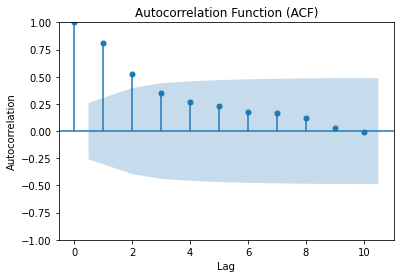

<Figure size 864x432 with 0 Axes>

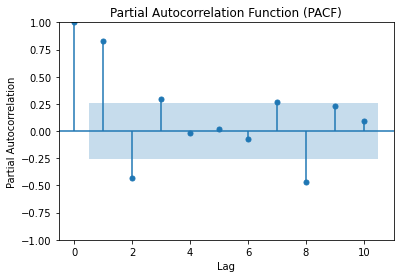

In [21]:
plt.figure(figsize=(16, 10))
plot_acf(df1['Product 1'], lags=10)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df1['Product 1'], lags=10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

- Autocorrelation Function (ACF):

A decrease in ACF values from 1 to 0 indicates a declining pattern of autocorrelation as the lag increases.
A decrease in autocorrelation suggests that consecutive observations in the time series become less correlated with each other as they are further apart in time.
This decreasing pattern is common in many time series, especially those without strong seasonality or long-term trends.

- Partial Autocorrelation Function (PACF):

Positive and negative values around 0.5 and 0.25 in the PACF plot indicate the presence of significant partial autocorrelation at those lags.
Positive values indicate direct correlations between the time series and its lagged values at those lags, while negative values indicate inverse correlations.
The magnitude of the partial autocorrelation coefficient represents the strength of the correlation between the time series and its lagged values after removing the effects of intermediate lags.
Based on these observations, you can draw the following conclusions:

The decreasing pattern of ACF values suggests that your time series may not exhibit strong autocorrelation beyond a certain lag, indicating a lack of persistent patterns or trends in the data over longer time intervals.
The significant positive and negative partial autocorrelation values in the PACF plot suggest that there are direct and inverse relationships between the time series and its lagged values at specific lags.
These observations can guide the selection of appropriate time series models, such as autoregressive (AR) or autoregressive integrated moving average (ARIMA) models, to capture the underlying correlation structure and make accurate forecasts.

# Checking for data stationarity based on that we will foresee our algorithms

In [22]:
adft = adfuller(df1['Product 1'].values)
print("stats value : ",adft[0])
print('P value :',adft[1])
print('critical value :')
for key, value in adft[4].items():
    print('\t%s: %.3f' % (key, value))

stats value :  -2.3732154404957417
P value : 0.14943927829533593
critical value :
	1%: -3.558
	5%: -2.917
	10%: -2.596


P Vlue is not less that adviced value that is 0.05 this means out time series is not stationary.
- Over the period of time out mean, variance and standard deviation is changing as we can see in our decomposition of time series.

In [23]:
dfnew = df1.loc[df1['Product 1'] > 0, ['Product 1']]
dfnew.head(4)

,Product 1
Date,
2019-04-01,1897.61
2019-05-01,1830.04
2019-06-01,1771.90
2019-07-01,1655.27


In [26]:
diff_1 = dfnew.diff(1)
diff_1

,Product 1
Date,
2019-04-01,NaN
2019-05-01,-67.57
2019-06-01,-58.14
2019-07-01,-116.63
2019-08-01,-136.41
2019-09-01,208.08
2019-10-01,222.79
2019-11-01,26.11
2019-12-01,68.72


In [27]:
diff_1.dropna(inplace=True)
diff_1

,Product 1
Date,
2019-05-01,-67.57
2019-06-01,-58.14
2019-07-01,-116.63
2019-08-01,-136.41
2019-09-01,208.08
2019-10-01,222.79
2019-11-01,26.11
2019-12-01,68.72
2020-01-01,-581.34


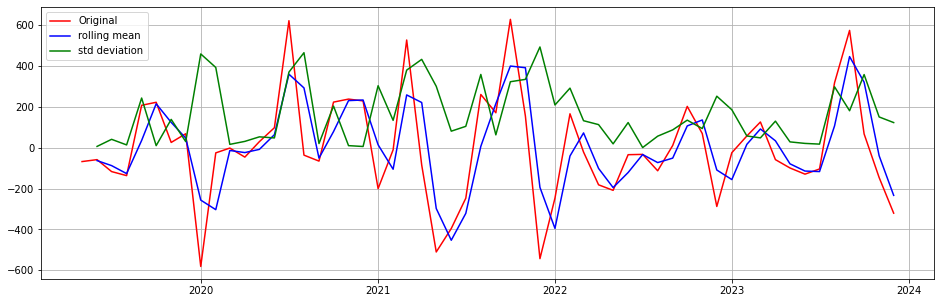

In [38]:
std_deviation = diff_1['Product 1'].rolling(window=2).std()
rolling_mean = diff_1['Product 1'].rolling(window=2).mean()
plt.figure(figsize=(16,5))
plt.plot(diff_1['Product 1'],label='Original',color='red')
plt.plot(rolling_mean,label='rolling mean',color='blue')
plt.plot(std_deviation,label='std deviation',color='green')
plt.legend()
plt.grid('both')
plt.show()

Even after doing one order differencing time series is not constant in multiple window sizes.
- We need to try one more differencing and act accordingly.

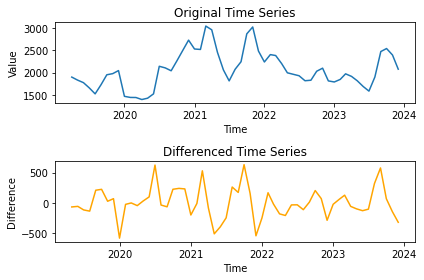

In [39]:
# Original time series plot
plt.subplot(2, 1, 1)
plt.plot(df1['Product 1'])
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')

# Differenced time series plot
plt.subplot(2, 1, 2)
plt.plot(diff_1['Product 1'], color='orange')
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Difference')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [32]:
diff2 = dfnew.diff(2)
diff2.head(5)

,Product 1
Date,
2019-04-01,NaN
2019-05-01,NaN
2019-06-01,-125.71
2019-07-01,-174.77
2019-08-01,-253.04


In [33]:
diff2.dropna(inplace=True)
diff2.head(10)

,Product 1
Date,
2019-06-01,-125.71
2019-07-01,-174.77
2019-08-01,-253.04
2019-09-01,71.67
2019-10-01,430.87
2019-11-01,248.90
2019-12-01,94.83
2020-01-01,-512.62
2020-02-01,-606.35


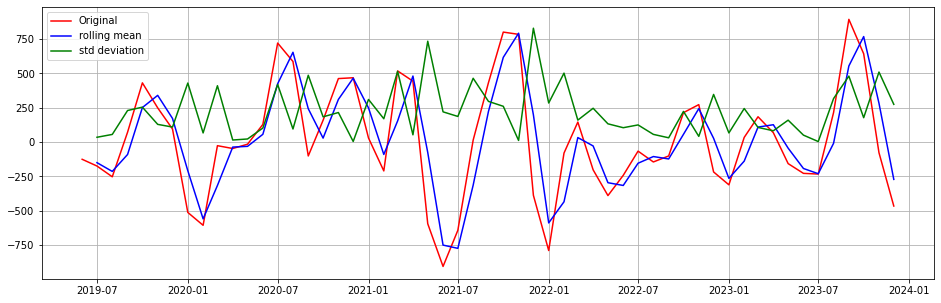

In [36]:
std_deviation = diff2['Product 1'].rolling(window=2).std()
rolling_mean = diff2['Product 1'].rolling(window=2).mean()
plt.figure(figsize=(16,5))
plt.plot(diff2['Product 1'],label='Original',color='red')
plt.plot(rolling_mean,label='rolling mean',color='blue')
plt.plot(std_deviation,label='std deviation',color='green')
plt.legend()
plt.grid('both')
plt.show()

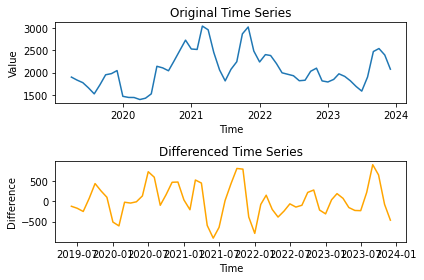

In [40]:
plt.subplot(2, 1, 1)
plt.plot(df1['Product 1'])
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')

# Differenced time series plot
plt.subplot(2, 1, 2)
plt.plot(diff2['Product 1'], color='orange')
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Difference')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [41]:
adft = adfuller(diff2['Product 1'].values)
print("stats value : ",adft[0])
print('P value :',adft[1])
print('critical value :')
for key, value in adft[4].items():
    print('\t%s: %.3f' % (key, value))

stats value :  -2.2474539963357865
P value : 0.18947513957859763
critical value :
	1%: -3.581
	5%: -2.927
	10%: -2.602


<Figure size 1152x720 with 0 Axes>

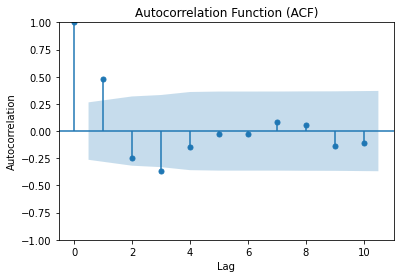

<Figure size 864x432 with 0 Axes>

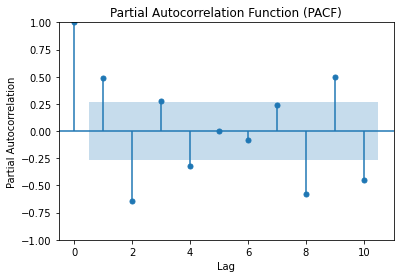

In [42]:
plt.figure(figsize=(16, 10))
plot_acf(diff2['Product 1'], lags=10)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(diff2['Product 1'], lags=10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

There is seasonality present We will go with Sarima modelto forecast but also check if there is any correlation tthen also apply Autoreggression and moving average model

The presence of positive and negative autocorrelation in the lagged values of 10 in the ACF plot after second-order differencing suggests that there may be some residual patterns or seasonality in the data that have not been fully removed. Here are some potential modeling approaches you can consider based on this information:

Seasonal Autoregressive Integrated Moving Average (SARIMA):

SARIMA models are extensions of ARIMA models that incorporate seasonal components to account for periodic patterns in the data.
The presence of positive and negative autocorrelation at lag 10 suggests that there may be seasonal patterns with a period of 10 time units.
You can try fitting a SARIMA model with appropriate seasonal differencing, autoregressive (AR), differencing (I), and moving average (MA) components to capture the seasonal behavior of the data.
Seasonal Decomposition with Exponential Smoothing (e.g., Holt-Winters):

Seasonal decomposition methods separate the time series into trend, seasonal, and residual components.
Exponential smoothing techniques, such as Holt-Winters, can be applied to each component to forecast future values.
This approach can effectively capture both trend and seasonal patterns in the data.
Machine Learning Models:

If traditional time series models like SARIMA or exponential smoothing do not adequately capture the patterns in the data, consider using machine learning models such as random forests, gradient boosting machines, or neural networks.
These models can learn complex patterns and relationships in the data and may offer better predictive performance in certain cases.
Iterative Approach:

Experiment with different modeling approaches and parameter settings, and evaluate their performance using appropriate validation techniques.
Iterate through the modeling process, refining your approach based on the insights gained from model diagnostics and evaluation.

- Exponential smoothening
- Sarima
- Machine learning
- RNN/LSTM

Mean Squared Error (MSE): 217.31603494823563


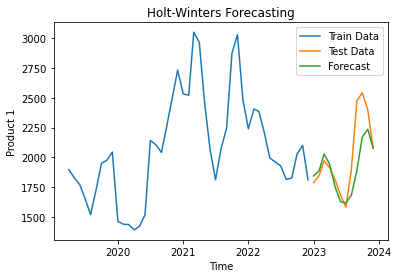

In [57]:
# Split the data into train and test sets
train_size = int(len(df1) * 0.8)  # 80% train, 20% test
train_data, test_data = df1[:train_size], df1[train_size:]

# Fit Holt-Winters model to the training data
model = ExponentialSmoothing(df1['Product 1'], trend='add', seasonal='add').fit()

# Make forecasts on the test data
forecast = model.forecast(len(test_data))# we can change number of forecasteing values.

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(test_data['Product 1'], forecast)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", rmse)

# Optionally, plot the original data and the forecasts
import matplotlib.pyplot as plt

plt.plot(train_data.index, train_data['Product 1'], label='Train Data')
plt.plot(test_data.index, test_data['Product 1'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Time')
plt.ylabel('Product 1')
plt.legend()
plt.show()

In [50]:
test_data['Product 1'].values

array([1787.47, 1845.22, 1971.5 , 1913.33, 1814.37, 1685.15, 1581.25,
       1899.66, 2474.59, 2542.37, 2396.61, 2076.27])

In [52]:
forecast.values

array([1843.58453242, 1885.96927377, 2028.02976308, 1942.16119021,
       1756.44560861, 1627.8318255 , 1617.26638013, 1682.70902336,
       1892.62271241, 2170.73851071, 2235.15454314, 2079.37587934])

# SARIMA MODEL

Mean Squared Error (MSE): 215849.76772077652


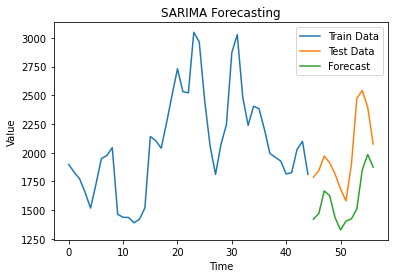

In [58]:
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train_data, test_data = df[:train_size], df[train_size:]

# Define the SARIMA model parameters
order = (1, 1, 1)  # ARIMA(p, d, q) parameters
seasonal_order = (1, 1, 1, 12)  # SARIMA(P, D, Q, S) parameters

# Fit SARIMA model to the training data
model = SARIMAX(train_data['Product 1'], order=order, seasonal_order=seasonal_order)
sarima_model = model.fit()

# Make forecasts on the test data
forecast = sarima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(test_data['Product 1'], forecast)
print("Mean Squared Error (MSE):", mse)

# Optionally, plot the original data and the forecasts
import matplotlib.pyplot as plt

plt.plot(train_data.index, train_data['Product 1'], label='Train Data')
plt.plot(test_data.index, test_data['Product 1'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()









Mean Squared Error (MSE): 267035.06677744


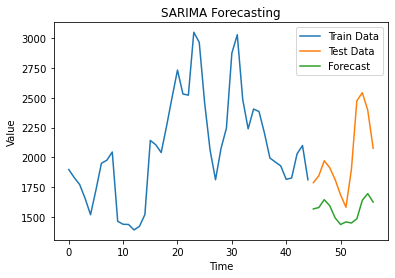

In [68]:
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train_data, test_data = df[:train_size], df[train_size:]

# Define the SARIMA model parameters
order = (1,0,1)  # ARIMA(p, d, q) parameters
seasonal_order = (1,0,1,12)  # SARIMA(P, D, Q, S) parameters

# Fit SARIMA model to the training data
model = SARIMAX(train_data['Product 1'], order=order, seasonal_order=seasonal_order)
sarima_model = model.fit()

# Make forecasts on the test data
forecast = sarima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(test_data['Product 1'], forecast)
print("Mean Squared Error (MSE):", mse)

# Optionally, plot the original data and the forecasts
import matplotlib.pyplot as plt

plt.plot(train_data.index, train_data['Product 1'], label='Train Data')
plt.plot(test_data.index, test_data['Product 1'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('SARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Mean Squared Error (MSE): 76940.50033281294


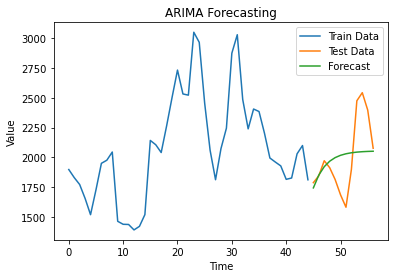

In [71]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the time series data
# and 'Product 1' is the column containing the time series values

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train_data, test_data = df[:train_size], df[train_size:]

# Define the ARIMA model parameters (p, d, q)
order = (1, 0, 1)  # ARIMA(p, d, q) parameters

# Fit ARIMA model to the training data
model = ARIMA(train_data['Product 1'], order=order)
arima_model = model.fit()

# Make forecasts on the test data
forecast = arima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(test_data['Product 1'], forecast)
print("Mean Squared Error (MSE):", mse)

# Optionally, plot the original data and the forecasts
plt.plot(train_data.index, train_data['Product 1'], label='Train Data')
plt.plot(test_data.index, test_data['Product 1'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('ARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Conclusion For Uni-Variate analysis

- Exponential smoothening model gave the best results as we can compare actual value to predicted valye.
- Sarima is ging values but rmse is very high need to find optimal values of p,d,q,s If works otherwise error is still high.
- ARIMA & MA is a complete flop because data is very less and highly varianced and seasonal.

# Learnings and Future-Scope
- By this we got the unerstanding of complete data with time series now we can still apply ML and RNN/LSTM to continue with this date.
- ALSO we can use different roduct sales as well and forecast accordingly.
- We can continue with Multi variate analysis and provide product sales forecast using different other factors present in dataset --> Indicators and RM if they are correlated and Influencing product sales.

# Lets Continue with Multivariate analysis -- deep mining